In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [2]:
titanic_df = pd.read_csv('tested.csv')

In [3]:
titanic_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
titanic_df.fillna(titanic_df.mean(), inplace=True)

In [4]:
X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
cart_clf = DecisionTreeClassifier(criterion='gini')
id3_clf = DecisionTreeClassifier(criterion='entropy')
c45_clf = DecisionTreeClassifier(criterion='entropy', splitter='best')

In [7]:
cart_clf.fit(X_train, y_train)
id3_clf.fit(X_train, y_train)
c45_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [8]:
cart_pred = cart_clf.predict(X_test)
id3_pred = id3_clf.predict(X_test)
c45_pred = c45_clf.predict(X_test)

In [9]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    sensitivity = recall  # Sensitivity is the same as recall
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, sensitivity, conf_matrix

In [10]:
cart_metrics = evaluate_model(y_test, cart_pred)
id3_metrics = evaluate_model(y_test, id3_pred)
c45_metrics = evaluate_model(y_test, c45_pred)

In [11]:
print("Metrics for CART:")
print("Accuracy:", cart_metrics[0])
print("Precision:", cart_metrics[1])
print("Recall (Sensitivity):", cart_metrics[2])
print("Confusion Matrix:\n", cart_metrics[4])

Metrics for CART:
Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]


In [12]:
print("\nMetrics for ID3:")
print("Accuracy:", id3_metrics[0])
print("Precision:", id3_metrics[1])
print("Recall (Sensitivity):", id3_metrics[2])
print("Confusion Matrix:\n", id3_metrics[4])


Metrics for ID3:
Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]


In [13]:
print("\nMetrics for C4.5:")
print("Accuracy:", c45_metrics[0])
print("Precision:", c45_metrics[1])
print("Recall (Sensitivity):", c45_metrics[2])
print("Confusion Matrix:\n", c45_metrics[4])


Metrics for C4.5:
Accuracy: 1.0
Precision: 1.0
Recall (Sensitivity): 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]


[Text(0.5, 0.75, 'Sex <= 0.5\ngini = 0.457\nsamples = 334\nvalue = [216, 118]\nclass = Not Survived'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 216\nvalue = [216, 0]\nclass = Not Survived'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 118\nvalue = [0, 118]\nclass = Survived')]

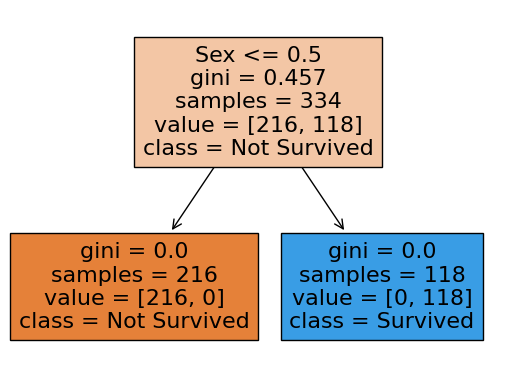

In [14]:
plot_tree(cart_clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])